<a href="https://colab.research.google.com/github/yeonghun00/stock-notes/blob/main/analysis/risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

미국
- 실업률
- Core CPI
- PMI
- PPI
- IC (실업수당청구건수)

시장
- vix
- CDS

스프레드
- TED spread
- 10Y - 2Y spread
- 10Y - 3M spread
- high yield spread

한국
- 환율 DEXKOUS
- 수출 XTEXVA01KRM667S
- 생산량 KORPROINDMISMEI

https://fred.stlouisfed.org/series/QKRR368BIS 이건 부동산

가격 벡테스팅. 예시 10년간 평균 가격 + 몇이면 거품 

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf
date = '2017-09-30'
vix_df = yf.Ticker('^VIX').history(interval='1d', period="max")
snp_df = yf.Ticker('^GSPC').history(interval='1d', period="max")

vix_df = vix_df[vix_df.index > date]
snp_df = snp_df[snp_df.index > date]

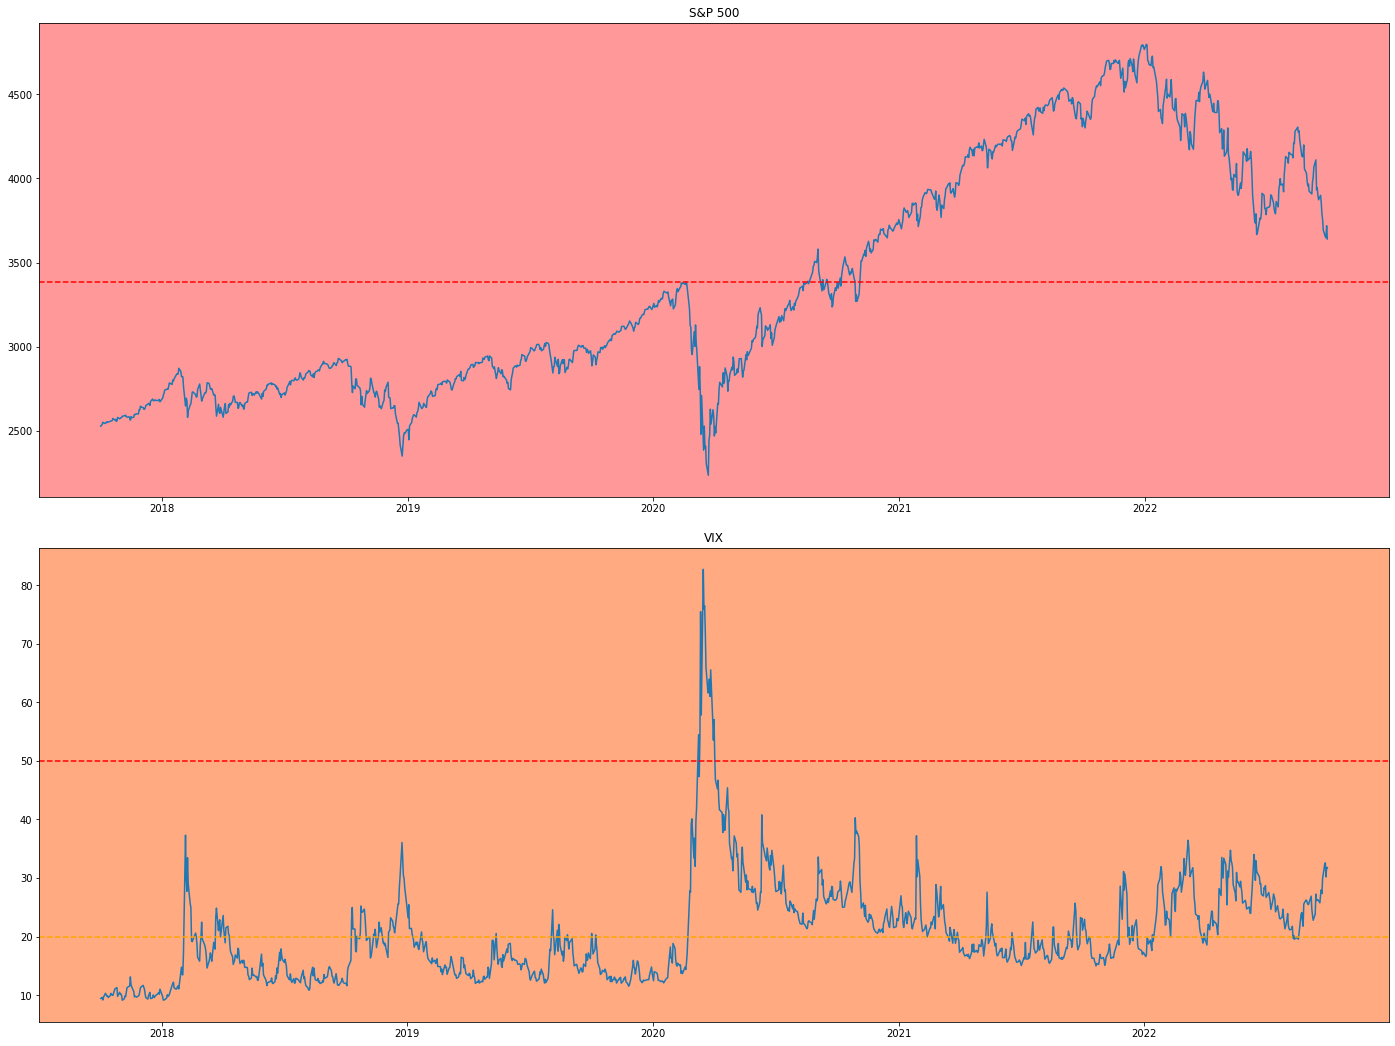

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(20,15))
fig.tight_layout(pad=3.0)

axs[0].title.set_text('S&P 500')
axs[0].plot(snp_df['Close'])
axs[0].axhline(snp_df['Close'].mean(), color = 'r', linestyle = '--')
# 이거 연평균 10%로 고정
if snp_df['Close'][-1] > snp_df['Close'].mean(): axs[0].set_facecolor('#ff9999')

axs[1].title.set_text('VIX')
axs[1].plot(vix_df['Close'])
axs[1].axhline(20, color = 'orange', linestyle = '--')
axs[1].axhline(50, color = 'r', linestyle = '--')
if vix_df['Close'][-1] > 20: axs[1].set_facecolor('#ffaa80')
elif vix_df['Close'][-1] > 50: axs[1].set_facecolor('#ff9999')

In [4]:
import requests
from io import StringIO
import numpy as np
import pandas as pd
from datetime import datetime

def get_fred(id, start_date='2000-01-01'):
  url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=' + id + '&revision_date=' + datetime.today().strftime('%Y-%m-%d') + '&nd=1901-01-01'
  r = requests.get(url)
  s = str(r.content,'utf-8')
  data = StringIO(s) 
  df = pd.read_csv(data)
  df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
  df[id] = [np.nan if x=='.' else float(x) for x in df[id]]
  df = df.set_index('DATE')
  df = df.rename(columns={id: "data"})
  df = df.ffill()
  return df[df.index > start_date]

In [5]:
ted_df = get_fred('TEDRATE', date)
t10y2y_df = get_fred('T10Y2Y', date)
t10y3m_df = get_fred('T10Y3M', date)
hy_df = get_fred('BAMLH0A0HYM2', date)

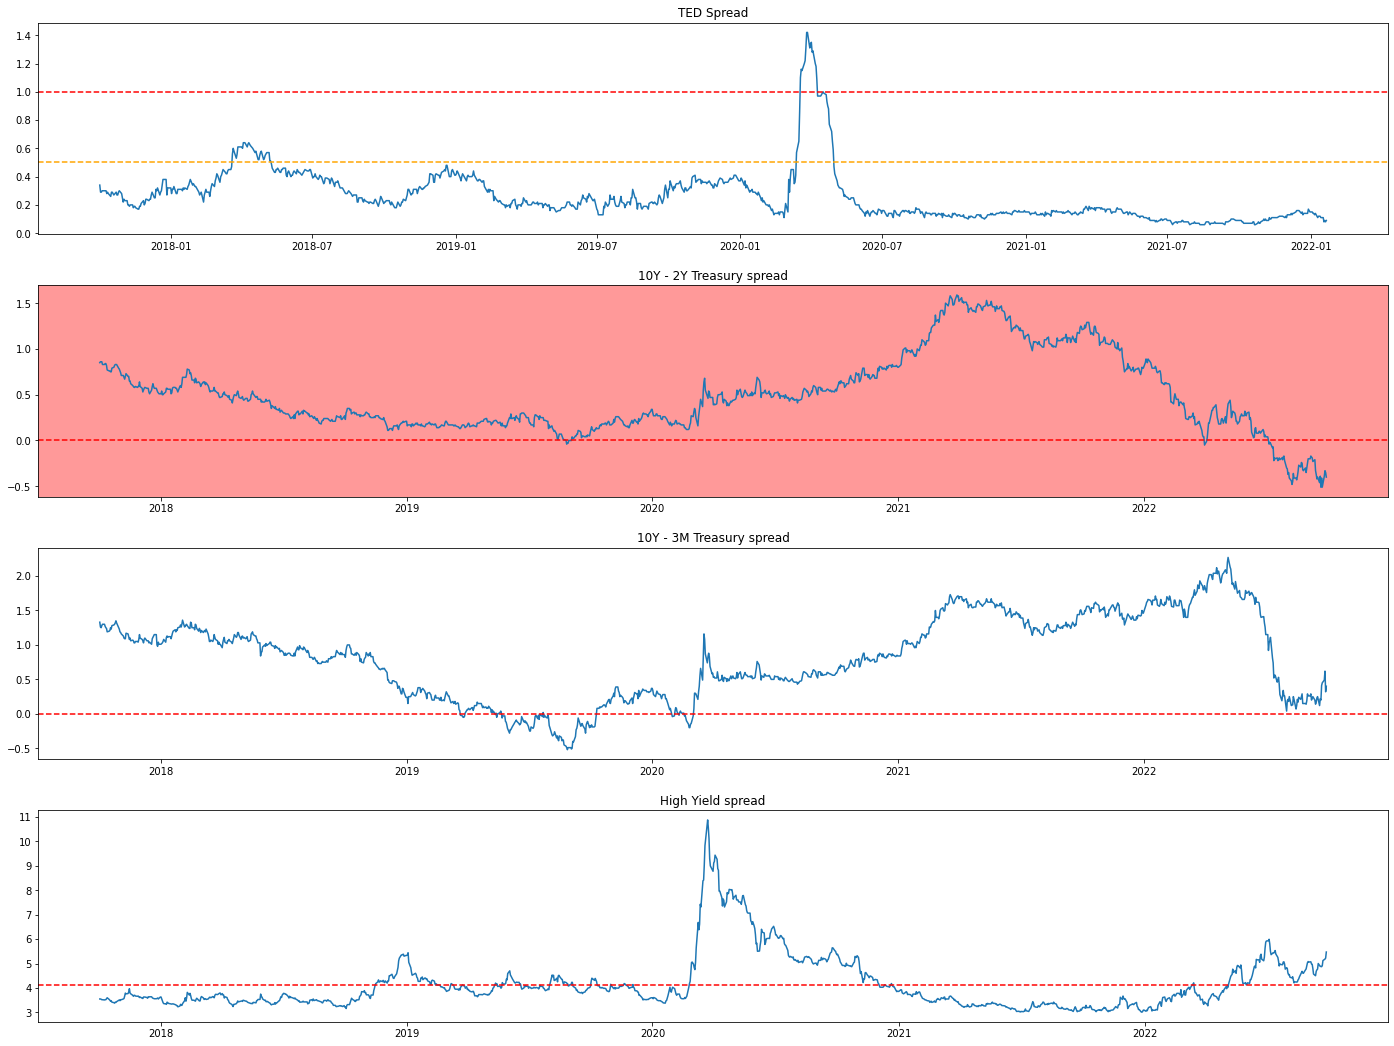

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(20,15))
fig.tight_layout(pad=3.0)

axs[0].title.set_text('TED Spread')
axs[0].plot(ted_df)
axs[0].axhline(0.5, color = 'orange', linestyle = '--')
axs[0].axhline(1, color = 'red', linestyle = '--')
if ted_df.iloc[-1][0] > 0.5: axs[0].set_facecolor('#ffaa80')
elif ted_df.iloc[-1][0] > 1: axs[0].set_facecolor('#ff9999')

axs[1].title.set_text('10Y - 2Y Treasury spread')
axs[1].plot(t10y2y_df)
axs[1].axhline(0, color = 'r', linestyle = '--')
if t10y2y_df.iloc[-1][0] < 0: axs[1].set_facecolor('#ff9999')

axs[2].title.set_text('10Y - 3M Treasury spread')
axs[2].plot(t10y3m_df)
axs[2].axhline(0, color = 'r', linestyle = '--')
if t10y3m_df.iloc[-1][0] < 0: axs[2].set_facecolor('#ff9999')

axs[3].title.set_text('High Yield spread')
axs[3].plot(hy_df)
axs[3].axhline(hy_df['data'].mean(), color = 'r', linestyle = '--')
if t10y3m_df.iloc[-1][0] > hy_df['data'].mean(): axs[3].set_facecolor('#ff9999')
fig.show()

In [7]:
cpi_df = get_fred('CPILFESL', date)
cpi_df['data'] = cpi_df['data'].pct_change(12) # to YoY
ppi_df = get_fred('PPIACO', date)
ppi_df['data'] = ppi_df['data'].pct_change(12) 
unemployment_df = get_fred('UNRATE', date)
ic_df = get_fred('ICSA', date)

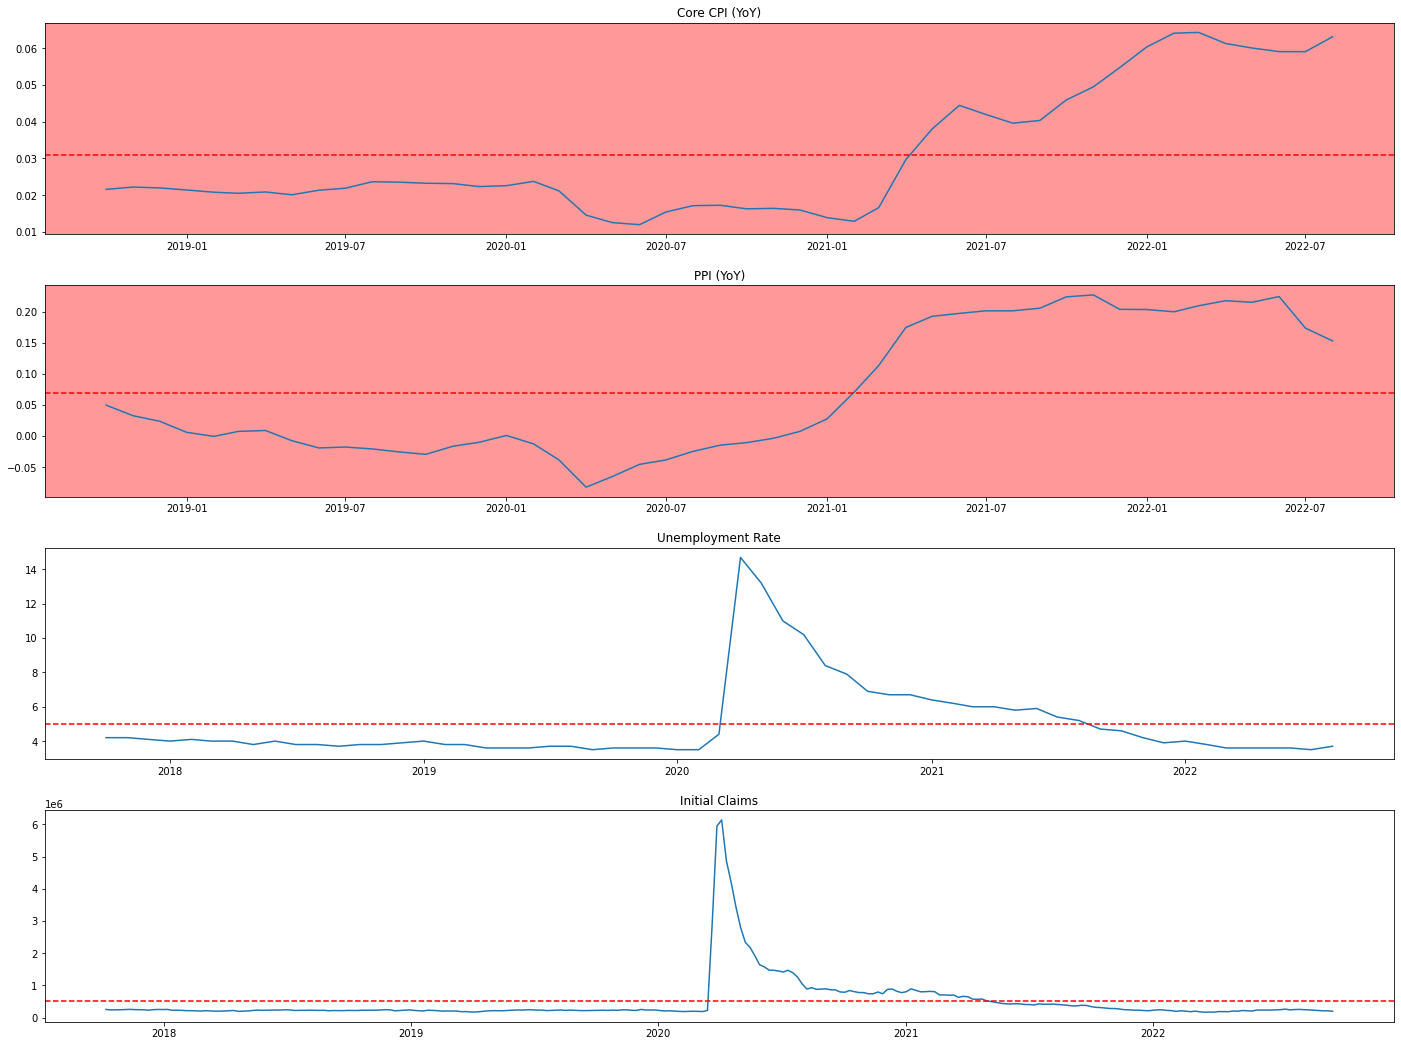

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(20,15))
fig.tight_layout(pad=3.0)

axs[0].title.set_text('Core CPI (YoY)')
axs[0].plot(cpi_df)
t = cpi_df['data'].mean() if cpi_df['data'].mean() > .02 else .02
axs[0].axhline(t, color = 'r', linestyle = '--')
if cpi_df.iloc[-1][0] > t: axs[0].set_facecolor('#ff9999')

axs[1].title.set_text('PPI (YoY)')
axs[1].plot(ppi_df)
axs[1].axhline(ppi_df['data'].mean(), color = 'r', linestyle = '--')
if ppi_df.iloc[-1][0] > ppi_df['data'].mean(): axs[1].set_facecolor('#ff9999')

axs[2].title.set_text('Unemployment Rate')
axs[2].plot(unemployment_df)
axs[2].axhline(unemployment_df['data'].mean(), color = 'r', linestyle = '--')
if unemployment_df.iloc[-1][0] > unemployment_df['data'].mean(): axs[2].set_facecolor('#ff9999')

axs[3].title.set_text('Initial Claims')
axs[3].plot(ic_df)
axs[3].axhline(ic_df['data'].mean(), color = 'r', linestyle = '--')
if ic_df.iloc[-1][0] > ic_df['data'].mean(): axs[3].set_facecolor('#ff9999')
fig.show()